In [1]:
# Utils analysis
from utils_analysis import *

# Standard
import torch
import numpy as np
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)
import os
import sys; sys.path.append("../")

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
%config InlineBackend.figure_format='retina'

Not deleting all pareto related files, if you want to recompute, run: update(recompute=True)
Making run overview, based on dir: /home/cbarkhof/code-thesis/NewsVAE/Runs
Making run overview of /home/cbarkhof/code-thesis/NewsVAE/Runs, in /home/cbarkhof/code-thesis/NewsVAE/final-analysis/Runs_run_overview.csv
pareto epoch not in full_par_dict for run: 2021-06-02-YELP | DECODER-ONLY-run-13:01:04
pareto epoch not in full_par_dict for run: 2021-06-02-PTB | DECODER-ONLY-run-13:01:37
Reading last checkpoint and extracting pareto dict and saving it to a pickle.
Reading all pareto dicts and calculating best checkpoint, saving it to a csv
error in calc_weighted_pareto_best_checkpoint list index out of range
error in calc_weighted_pareto_best_checkpoint list index out of range
--------------------------------------------------
Making run overview, based on dir: /home/cbarkhof/code-thesis/NewsVAE/Runs-ablation
Making run overview of /home/cbarkhof/code-thesis/NewsVAE/Runs-ablation, in /home/cbarkhof

In [2]:
def calc_posterior_stats(mu, logvar):
    stats_dict = {}
    std = torch.sqrt(logvar.exp())

    mean_z_mu = mu.mean(dim=1).mean()
    std_z_mu = torch.std(mu, dim=1).mean()

    mean_z_std = std.mean(dim=1).mean()
    std_z_std = torch.std(std, dim=1).mean()

    mean_x_mu = mu.mean(dim=0).mean()
    std_x_mu = torch.std(mu, dim=0).mean()

    mean_x_std = std.mean(dim=0).mean()
    std_x_std = torch.std(std, dim=0).mean()

    stats_dict["mean_mu"] = mean_z_mu.item()
    stats_dict["std_z_mu"] = std_z_mu.item()
    stats_dict["std_z_std"] = std_z_std.item()
    
    stats_dict["mean_std"] = mean_z_std.item()
    
    stats_dict["std_x_mu"] = std_x_mu.item()
    stats_dict["std_x_std"] = std_x_std.item()

    return stats_dict

In [3]:
VAL_BATCHES = 10

all_post = {}
all_post_stats = {}
for exp_name in RUN_DIRS:
    all_post[exp_name] = {}
    all_post_stats[exp_name] = {}
    
    run_overview = read_overview_csv(exp_name=exp_name)
    
    for row_i, row in run_overview.iterrows():
        run_name, clean_name = row["run_name"], row["clean_name"]
        
        hp_details = parse_run_name(run_name, exp_name)
        
        try:
            sum_stats = get_sum_stats_run(run_name, exp_name=exp_name, val_batches=VAL_BATCHES)
            all_post[exp_name][clean_name] = {
                "latents":sum_stats["latent_z"], # batch, n_samples, latent_dim
                "logvar":sum_stats["logvar"], # batch, latent_dim
                "mu": sum_stats["mu"]} # batch, latent_dim
            all_post_stats[exp_name][clean_name] = {**calc_posterior_stats(all_post[exp_name][clean_name]["mu"], 
                                                                        all_post[exp_name][clean_name]["logvar"]),
                                                    **hp_details}
        except Exception as e:
            print(f"** Error for {clean_name}: {e}")
        
#         break
#     break

** Error for YELP | DEC-ONLY | : [Errno 2] No such file or directory: '/home/cbarkhof/code-thesis/NewsVAE/final-analysis/result-files/Runs/2021-06-02-YELP | DECODER-ONLY-run-13:01:04/validation_results_10_batches_200_samples.p'
** Error for PTB | AE | matrix: [Errno 2] No such file or directory: '/home/cbarkhof/code-thesis/NewsVAE/final-analysis/result-files/Runs/2021-06-04-PTB | AE | matrix-run-02:44:35/validation_results_10_batches_200_samples.p'
** Error for PTB | DEC-ONLY | : [Errno 2] No such file or directory: '/home/cbarkhof/code-thesis/NewsVAE/final-analysis/result-files/Runs/2021-06-02-PTB | DECODER-ONLY-run-13:01:37/validation_results_10_batches_200_samples.p'
** Error for PTB | AE | mem+emb: [Errno 2] No such file or directory: '/home/cbarkhof/code-thesis/NewsVAE/final-analysis/result-files/Runs/2021-06-05-PTB | AE | memory-embeddings-run-05:11:41/validation_results_10_batches_200_samples.p'
** Error for YELP | AE | matrix: [Errno 2] No such file or directory: '/home/cbarkho

In [4]:
for exp_name, stats in all_post_stats.items():
    display(pd.DataFrame(stats).transpose().drop(["run_name", "clean_name"], axis=1))

,mean_mu,std_z_mu,std_z_std,mean_std,std_x_mu,std_x_std,mech_string,dataset,optimisation,drop,target_rate,matrix,emb,mem
YELP | MDR-0.5 | matrix+mem | DROP 40,0.02,0.75,0.23,0.64,0.68,0.05,matrix+mem,YELP,MDR-0.5,0.40,0.50,True,False,True
PTB | CYC-FB-0.5 | matrix+mem,0.03,0.62,0.05,0.51,0.60,0.05,matrix+mem,PTB,CYC-FB-0.5,0.00,0.50,True,False,True
YELP | VAE | matrix,-0.00,0.01,0.00,1.00,0.00,0.00,matrix,YELP,VAE,0.00,0.00,True,False,False
YELP | CYC-FB-0.5 | matrix+mem,-0.02,0.79,0.03,0.43,0.77,0.02,matrix+mem,YELP,CYC-FB-0.5,0.00,0.50,True,False,True
YELP | MDR-0.5 | mem+emb | DROP 40,-0.02,0.76,0.21,0.64,0.71,0.05,mem+emb,YELP,MDR-0.5,0.40,0.50,False,True,True
PTB | VAE | mem,-0.00,0.01,0.01,1.00,0.01,0.00,mem,PTB,VAE,0.00,0.00,False,False,True
PTB | VAE | mem | DROP 40,0.00,0.01,0.00,1.00,0.00,0.00,mem,PTB,VAE,0.40,0.00,False,False,True
PTB | VAE | mem+emb,-0.00,0.01,0.01,0.99,0.01,0.00,mem+emb,PTB,VAE,0.00,0.00,False,True,True
PTB | VAE | mem+emb | DROP 40,0.00,0.01,0.00,1.00,0.01,0.00,mem+emb,PTB,VAE,0.40,0.00,False,True,True
PTB | MDR-0.5 | matrix+mem,0.00,0.73,0.24,0.66,0.66,0.05,matrix+mem,PTB,MDR-0.5,0.00,0.50,True,False,True


,mean_mu,std_z_mu,std_z_std,mean_std,std_x_mu,std_x_std,drop,dataset,optimisation,mem,emb,matrix
YELP | CYC+FB-0.5 | mem,0.00,0.77,0.01,0.42,0.76,0.02,0.00,YELP,CYC+FB-0.5,True,False,False
YELP | CYC | mem,-0.00,0.26,0.01,0.84,0.25,0.01,0.00,YELP,CYC,True,False,False
YELP | FB-0.5 | mem,-0.01,0.73,0.09,0.50,0.72,0.08,0.00,YELP,FB-0.5,True,False,False
YELP | MDR-0.5 | mem,-0.02,0.74,0.25,0.66,0.63,0.04,0.00,YELP,MDR-0.5,True,False,False


,mean_mu,std_z_mu,std_z_std,mean_std,std_x_mu,std_x_std,mech_string,dataset_name,dataset,target_rate,optimisation,drop,mem,emb,matrix
PTB | FB | mem+emb | Target rate: 0.25,0.02,0.40,0.07,0.70,0.39,0.08,mem+emb,PTB,PTB,0.25,FB-0.5,0.00,True,True,False
PTB | FB | mem+emb | Target rate: 0.5,0.00,0.50,0.07,0.56,0.48,0.08,mem+emb,PTB,PTB,0.5,FB-0.5,0.00,True,True,False
PTB | FB | mem+emb | Target rate: 0.125,0.01,0.31,0.05,0.83,0.29,0.06,mem+emb,PTB,PTB,0.125,FB-0.5,0.00,True,True,False
PTB | FB | mem+emb | Target rate: 1.0,0.01,0.61,0.04,0.32,0.60,0.05,mem+emb,PTB,PTB,1.0,FB-0.5,0.00,True,True,False
PTB | FB | mem+emb | Target rate: 0.75,0.00,0.56,0.05,0.43,0.54,0.06,mem+emb,PTB,PTB,0.75,FB-0.5,0.00,True,True,False


# Plot latent space

In [5]:
import scipy.stats
import random

def plot_latents(posts, clean_name, plot_N_sep_posteriors=10, plot_N_dims=10):
    x = np.linspace(-4, 4, 500)
    y = scipy.stats.norm.pdf(x, 0, 1)

    latents = posts["latents"][:, 0, :].numpy()

    mean = posts["mu"]
    mean_mean = mean.mean(dim=0)
    std = posts["logvar"].mul(0.5).exp()
    std_mean = std.mean(dim=0)

    latent_size = 32
    #latent_size, _, _, _ = extract_info_from_clean_name(get_clean_name(r))

    fig, axs = plt.subplots(nrows=1, ncols=plot_N_dims, figsize=(plot_N_dims*2, 8))

    dims = random.sample(range(latent_size), k=plot_N_dims)

    for i, d in enumerate(dims):
        axs[i].grid(b=False, which="both")

        y_mean_post_i = scipy.stats.norm.pdf(x, mean_mean[d], std_mean[d])

        if i > 0:
            axs[i].set_yticks([])

        #axs[i].grid = False
        axs[i].set_xticks([])
        axs[i].hist(latents[:, d], orientation="horizontal", bins=50, density=True, alpha=0.3, label="Latent sample histogram\n(whole validation set)")
        axs[i].set_ylim([-4, 4])

        for n in range(plot_N_sep_posteriors):

            choice_int = np.random.randint(0, len(latents))

            y_sep_post_i = scipy.stats.norm.pdf(x, mean[choice_int, d], std[choice_int, d])

            label = "$q(z|x_i)$ for randomly chosen $i$" if n == 0 else None

            axs[i].plot(y_sep_post_i, x, color='blue', linewidth=1, label=label, alpha=0.1)

        #axs[i].axhline(color='b', linewidth=1) #xmin=0, xmax=50, 
        axs[i].plot(y, x, color='r', linewidth=1, label="Standard Gaussian")
        axs[i].plot(y_mean_post_i, x, color='green', linewidth=1, label="Average posterior")
        axs[i].set_title(f"$\mu$ = {mean_mean[d]:.2f}\n $\sigma^2$ = {std_mean[d]:.2f}", size=7, y=1.03)

    axs[-1].legend(loc=(-2.5, 1.15), prop={'family':'serif','weight':300, 'size':14})

    fig.suptitle(clean_name, size=16, y=1.04)
    plt.show()

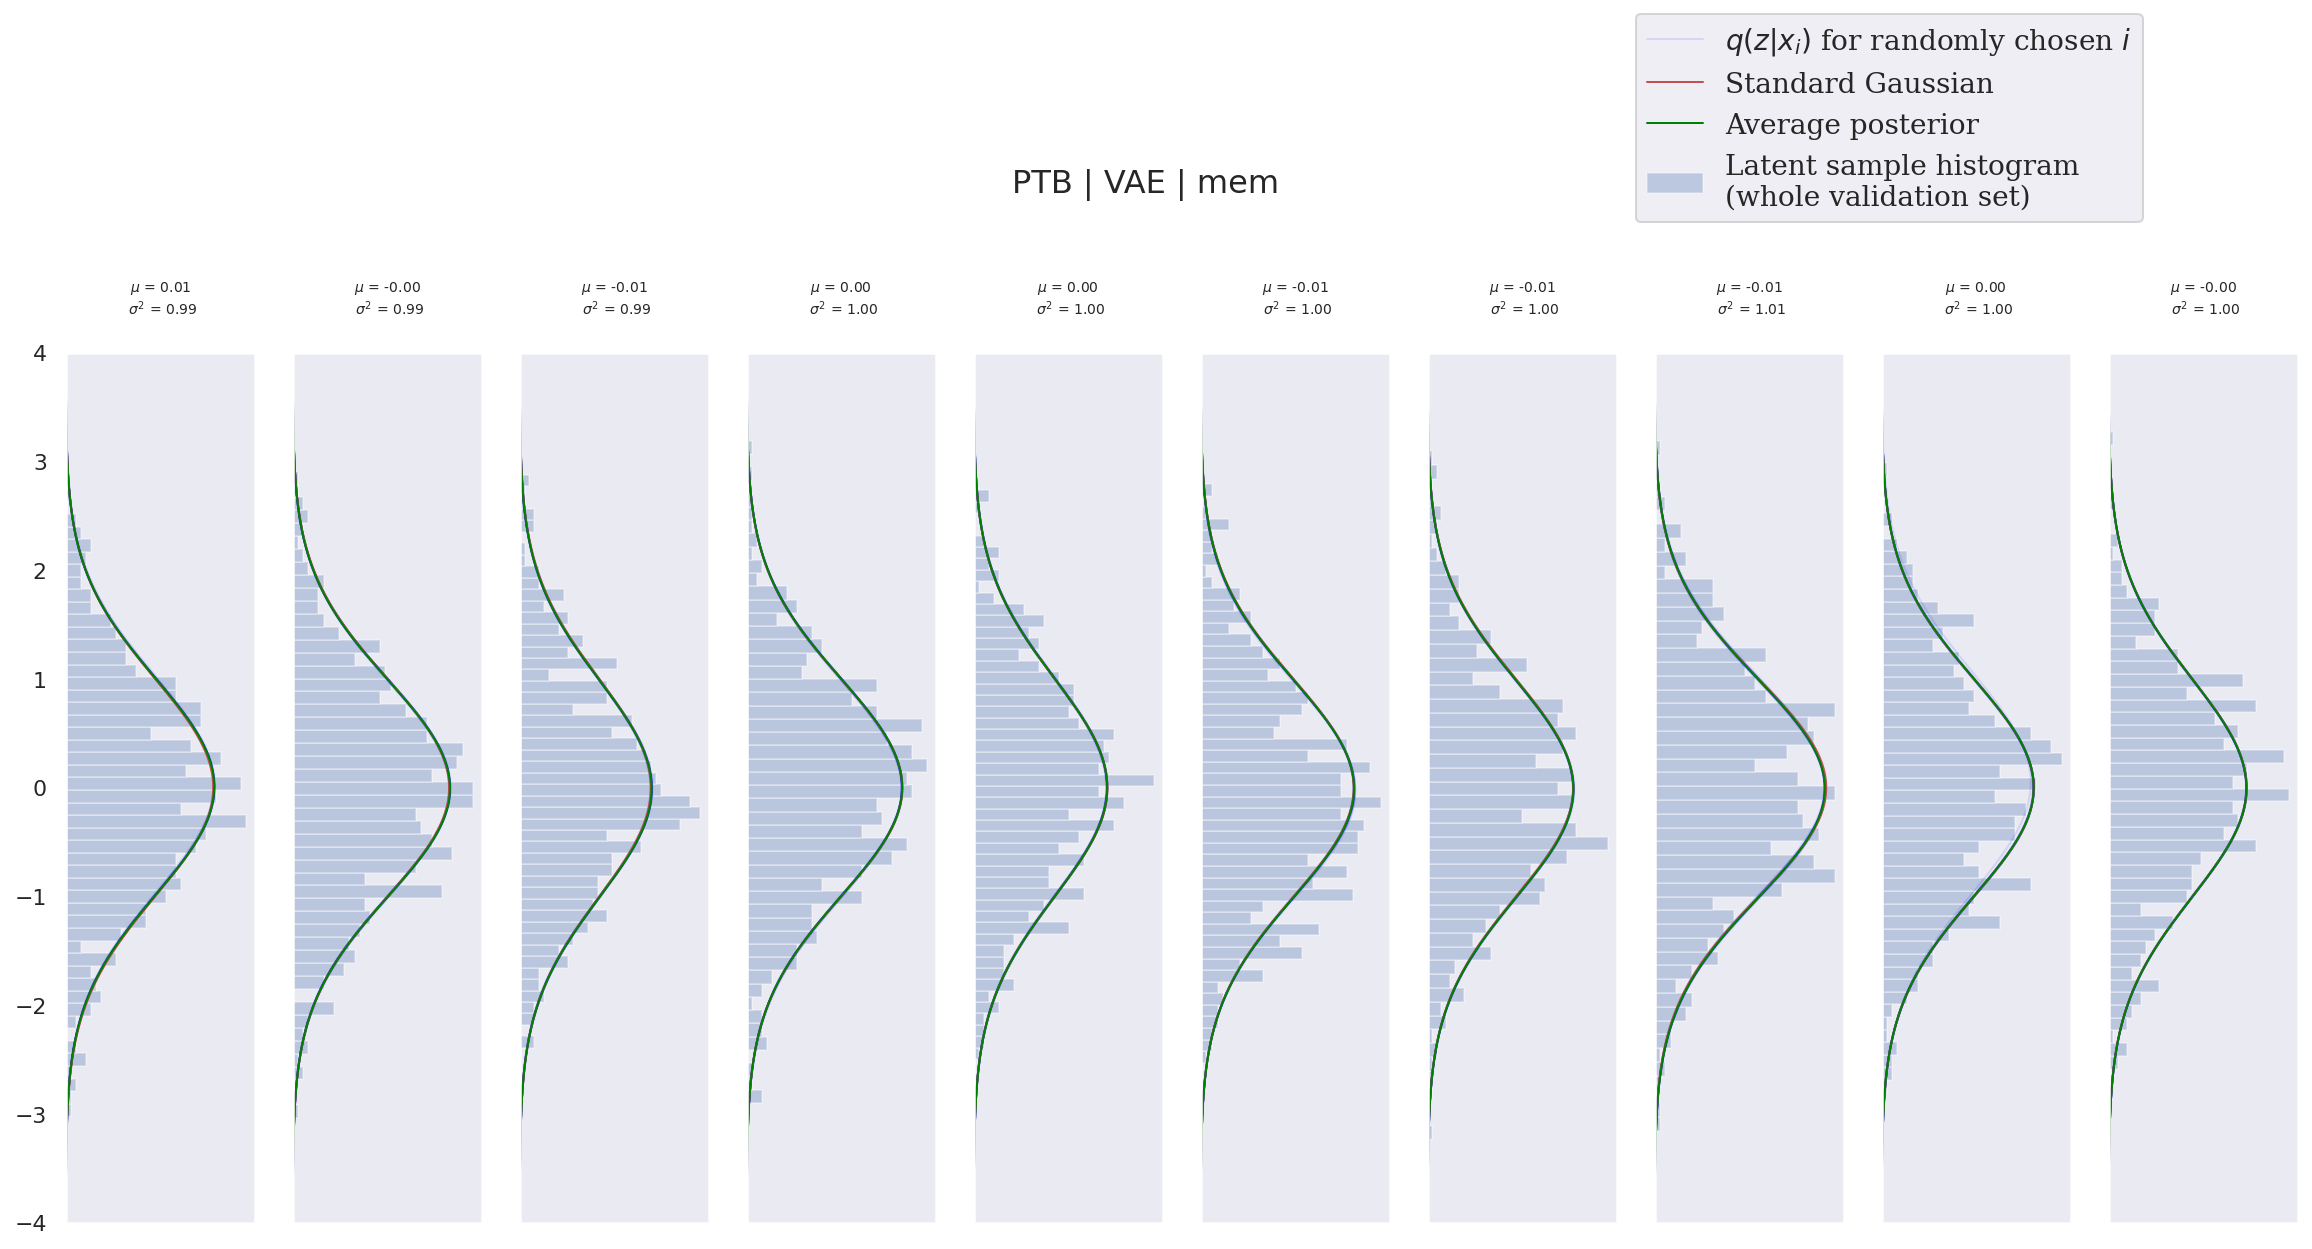

In [10]:
plot_N_sep_posteriors = 20
plot_N_dims = 10


clean_name = "PTB | VAE | mem"
exp = "Runs"
posts = all_post[exp][clean_name]
plot_latents(posts, clean_name, plot_N_dims=plot_N_dims, plot_N_sep_posteriors=plot_N_sep_posteriors)

# for exp, exp_results in all_post.items():
#     for clean_name, posts in exp_results.items():
#         plot_latents(posts, clean_name, plot_N_dims=plot_N_dims, plot_N_sep_posteriors=plot_N_sep_posteriors)


In [9]:
all_post["Runs"].keys()

dict_keys(['YELP | MDR-0.5 | matrix+mem | DROP 40', 'PTB | CYC-FB-0.5 | matrix+mem', 'YELP | VAE | matrix', 'YELP | CYC-FB-0.5 | matrix+mem', 'YELP | MDR-0.5 | mem+emb | DROP 40', 'PTB | VAE | mem', 'PTB | VAE | mem | DROP 40', 'PTB | VAE | mem+emb', 'PTB | VAE | mem+emb | DROP 40', 'PTB | MDR-0.5 | matrix+mem', 'YELP | CYC-FB-0.5 | matrix', 'YELP | MDR-0.5 | matrix | DROP 40', 'PTB | CYC-FB-0.5 | mem', 'PTB | CYC-FB-0.5 | mem | DROP 40', 'PTB | CYC-FB-0.5 | mem+emb', 'PTB | CYC-FB-0.5 | mem+emb | DROP 40', 'PTB | CYC-FB-0.5 | matrix+mem | DROP 40', 'YELP | VAE | matrix+mem', 'YELP | MDR-0.5 | matrix', 'PTB | AE | mem', 'PTB | MDR-0.5 | mem', 'PTB | MDR-0.5 | mem | DROP 40', 'PTB | MDR-0.5 | mem+emb', 'PTB | MDR-0.5 | mem+emb | DROP 40', 'PTB | MDR-0.5 | matrix', 'YELP | VAE | matrix | DROP 40', 'YELP | CYC-FB-0.5 | matrix+mem | DROP 40', 'PTB | VAE | matrix+mem', 'YELP | VAE | mem', 'YELP | VAE | mem | DROP 40', 'YELP | VAE | mem+emb', 'YELP | VAE | mem+emb | DROP 40', 'PTB | MDR-0.5 

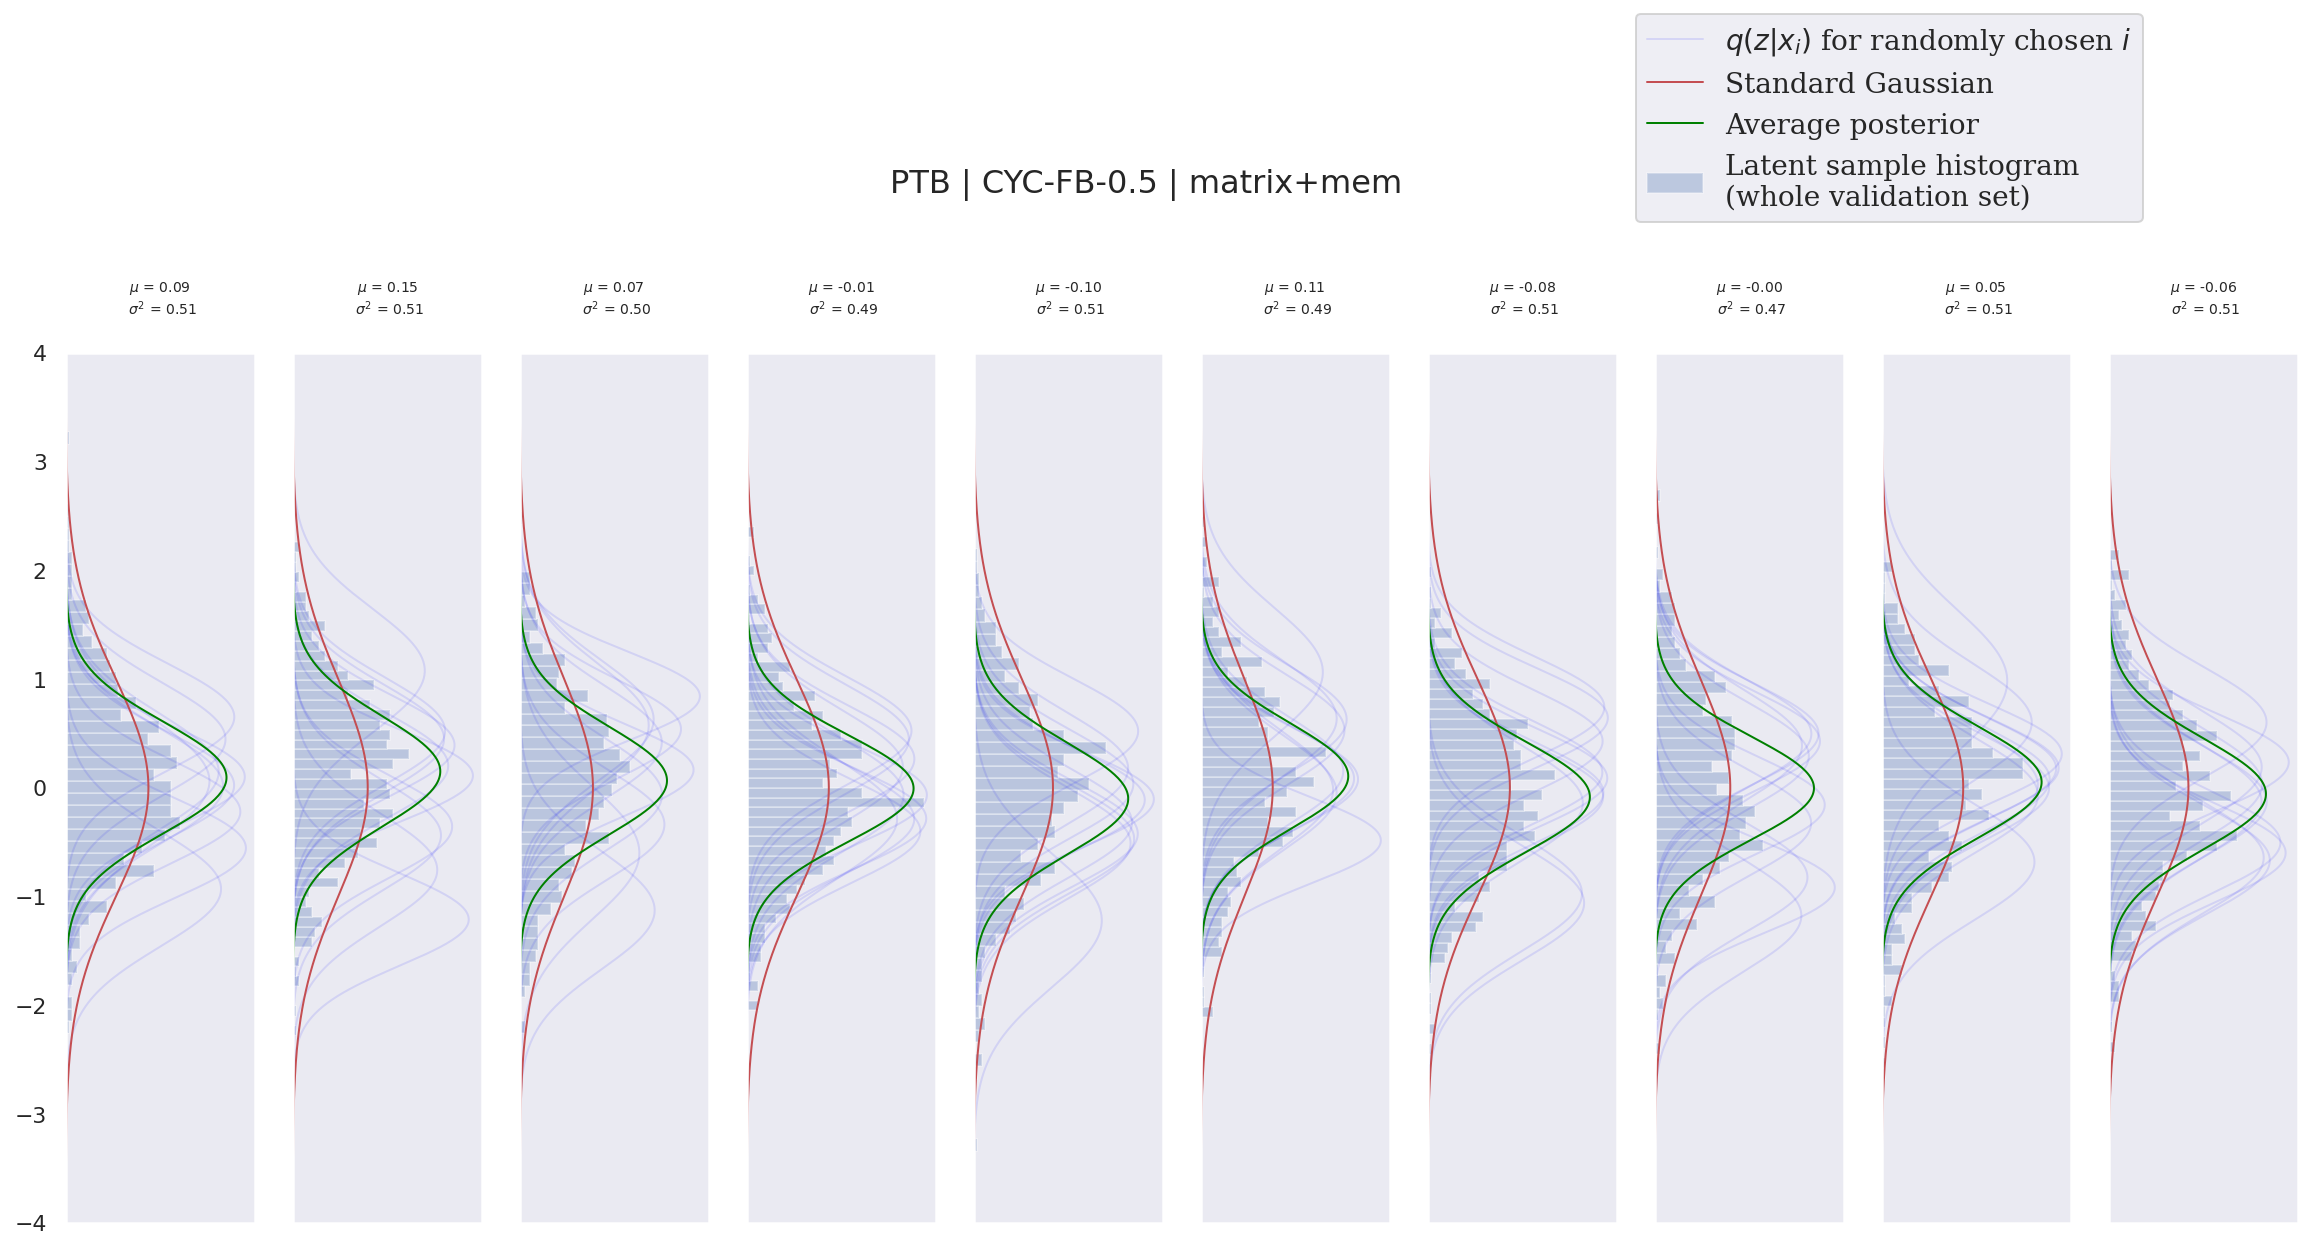

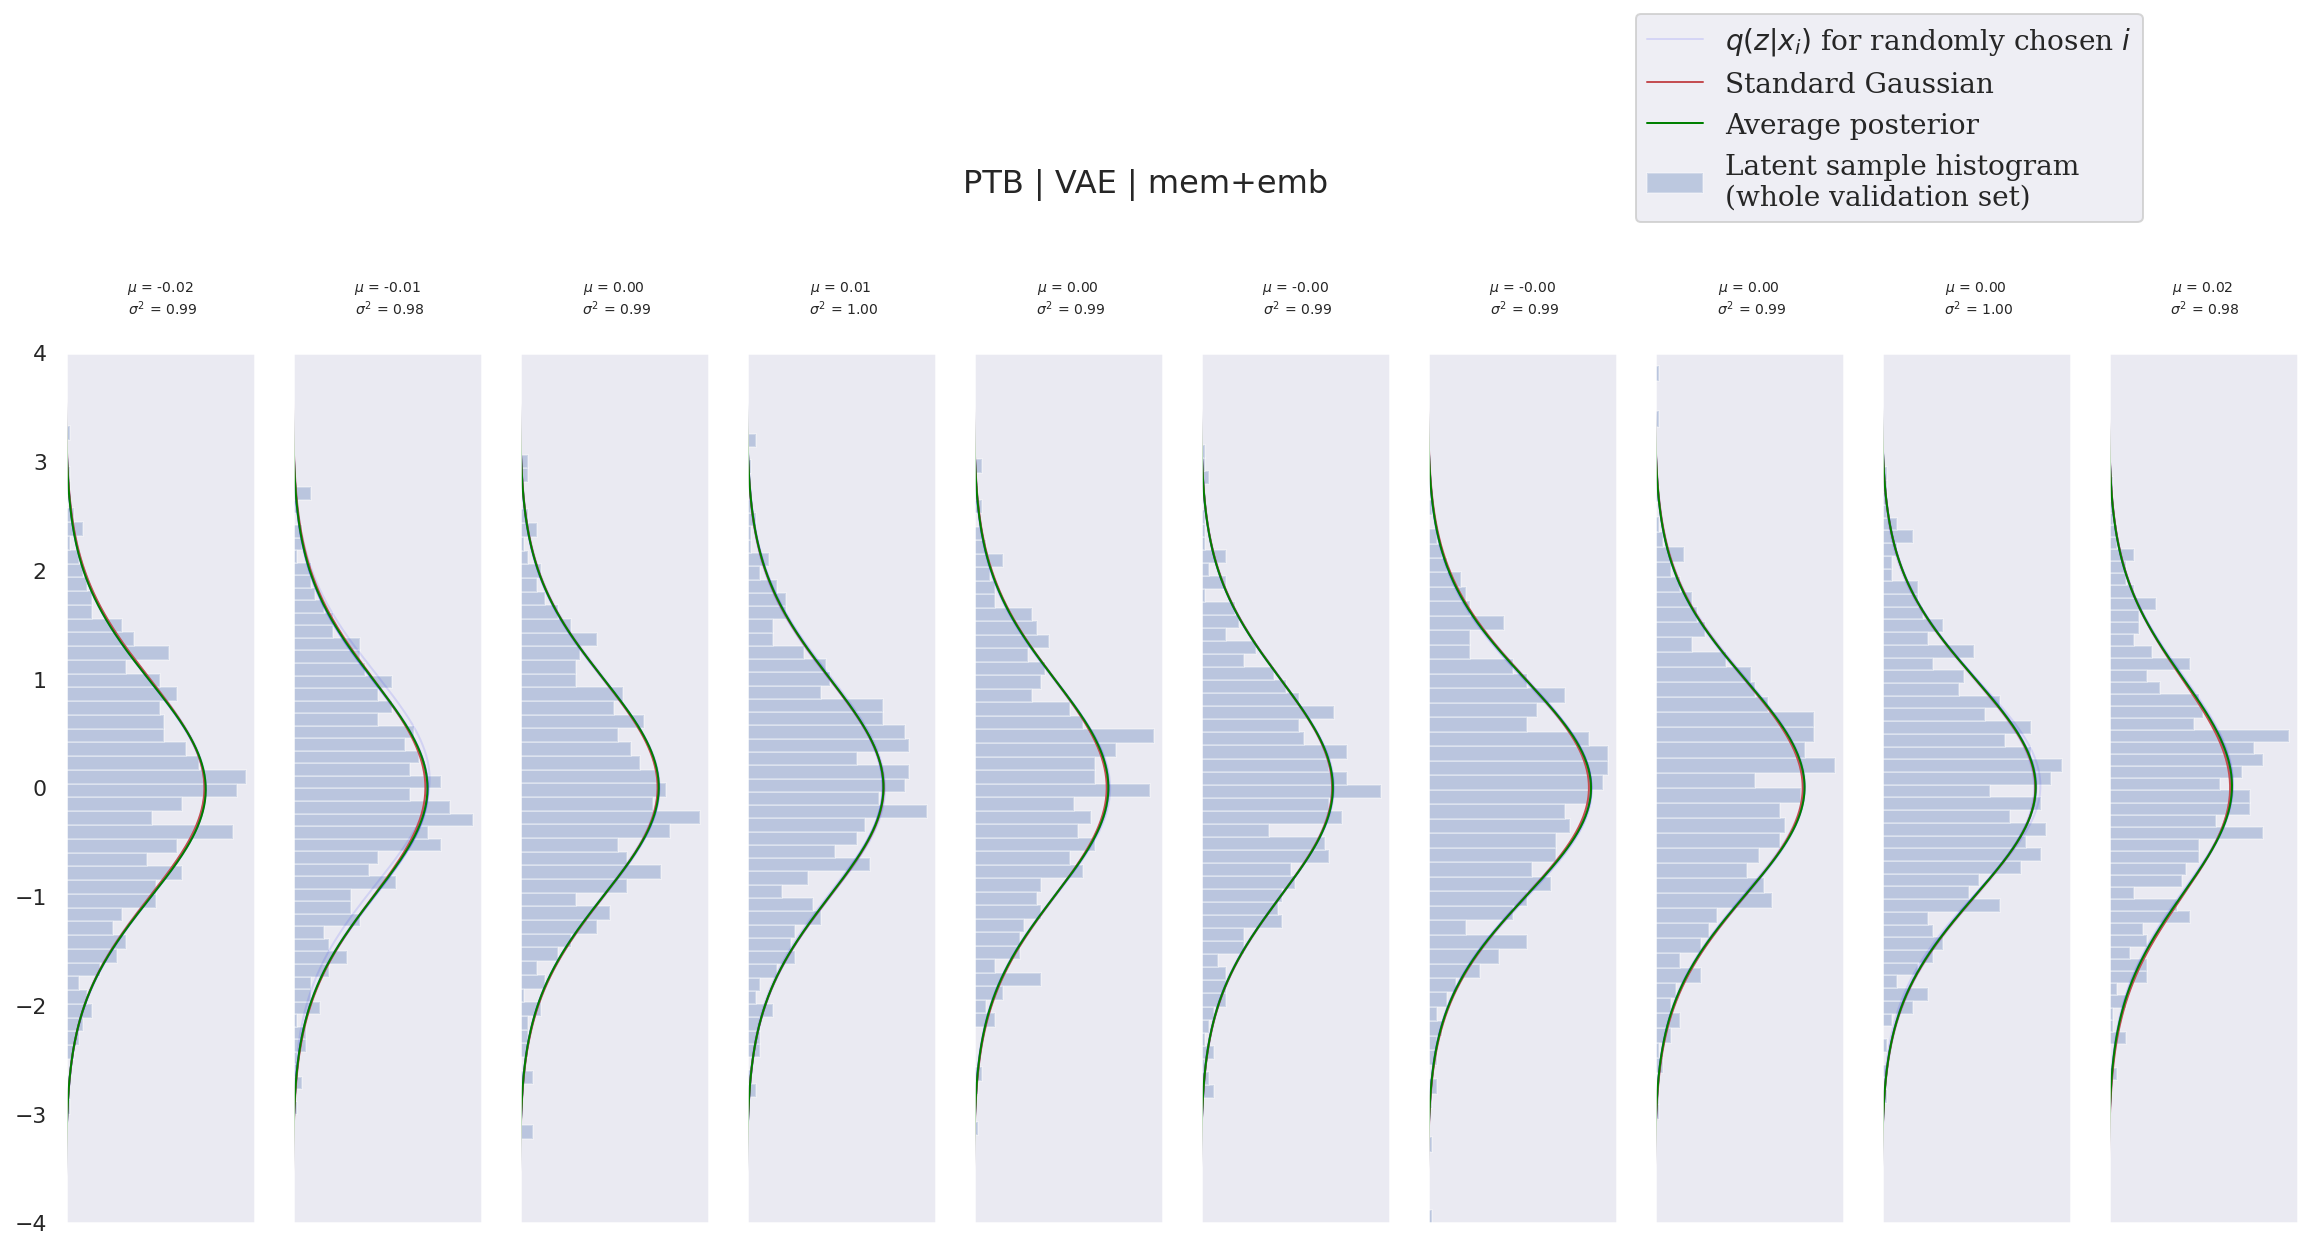

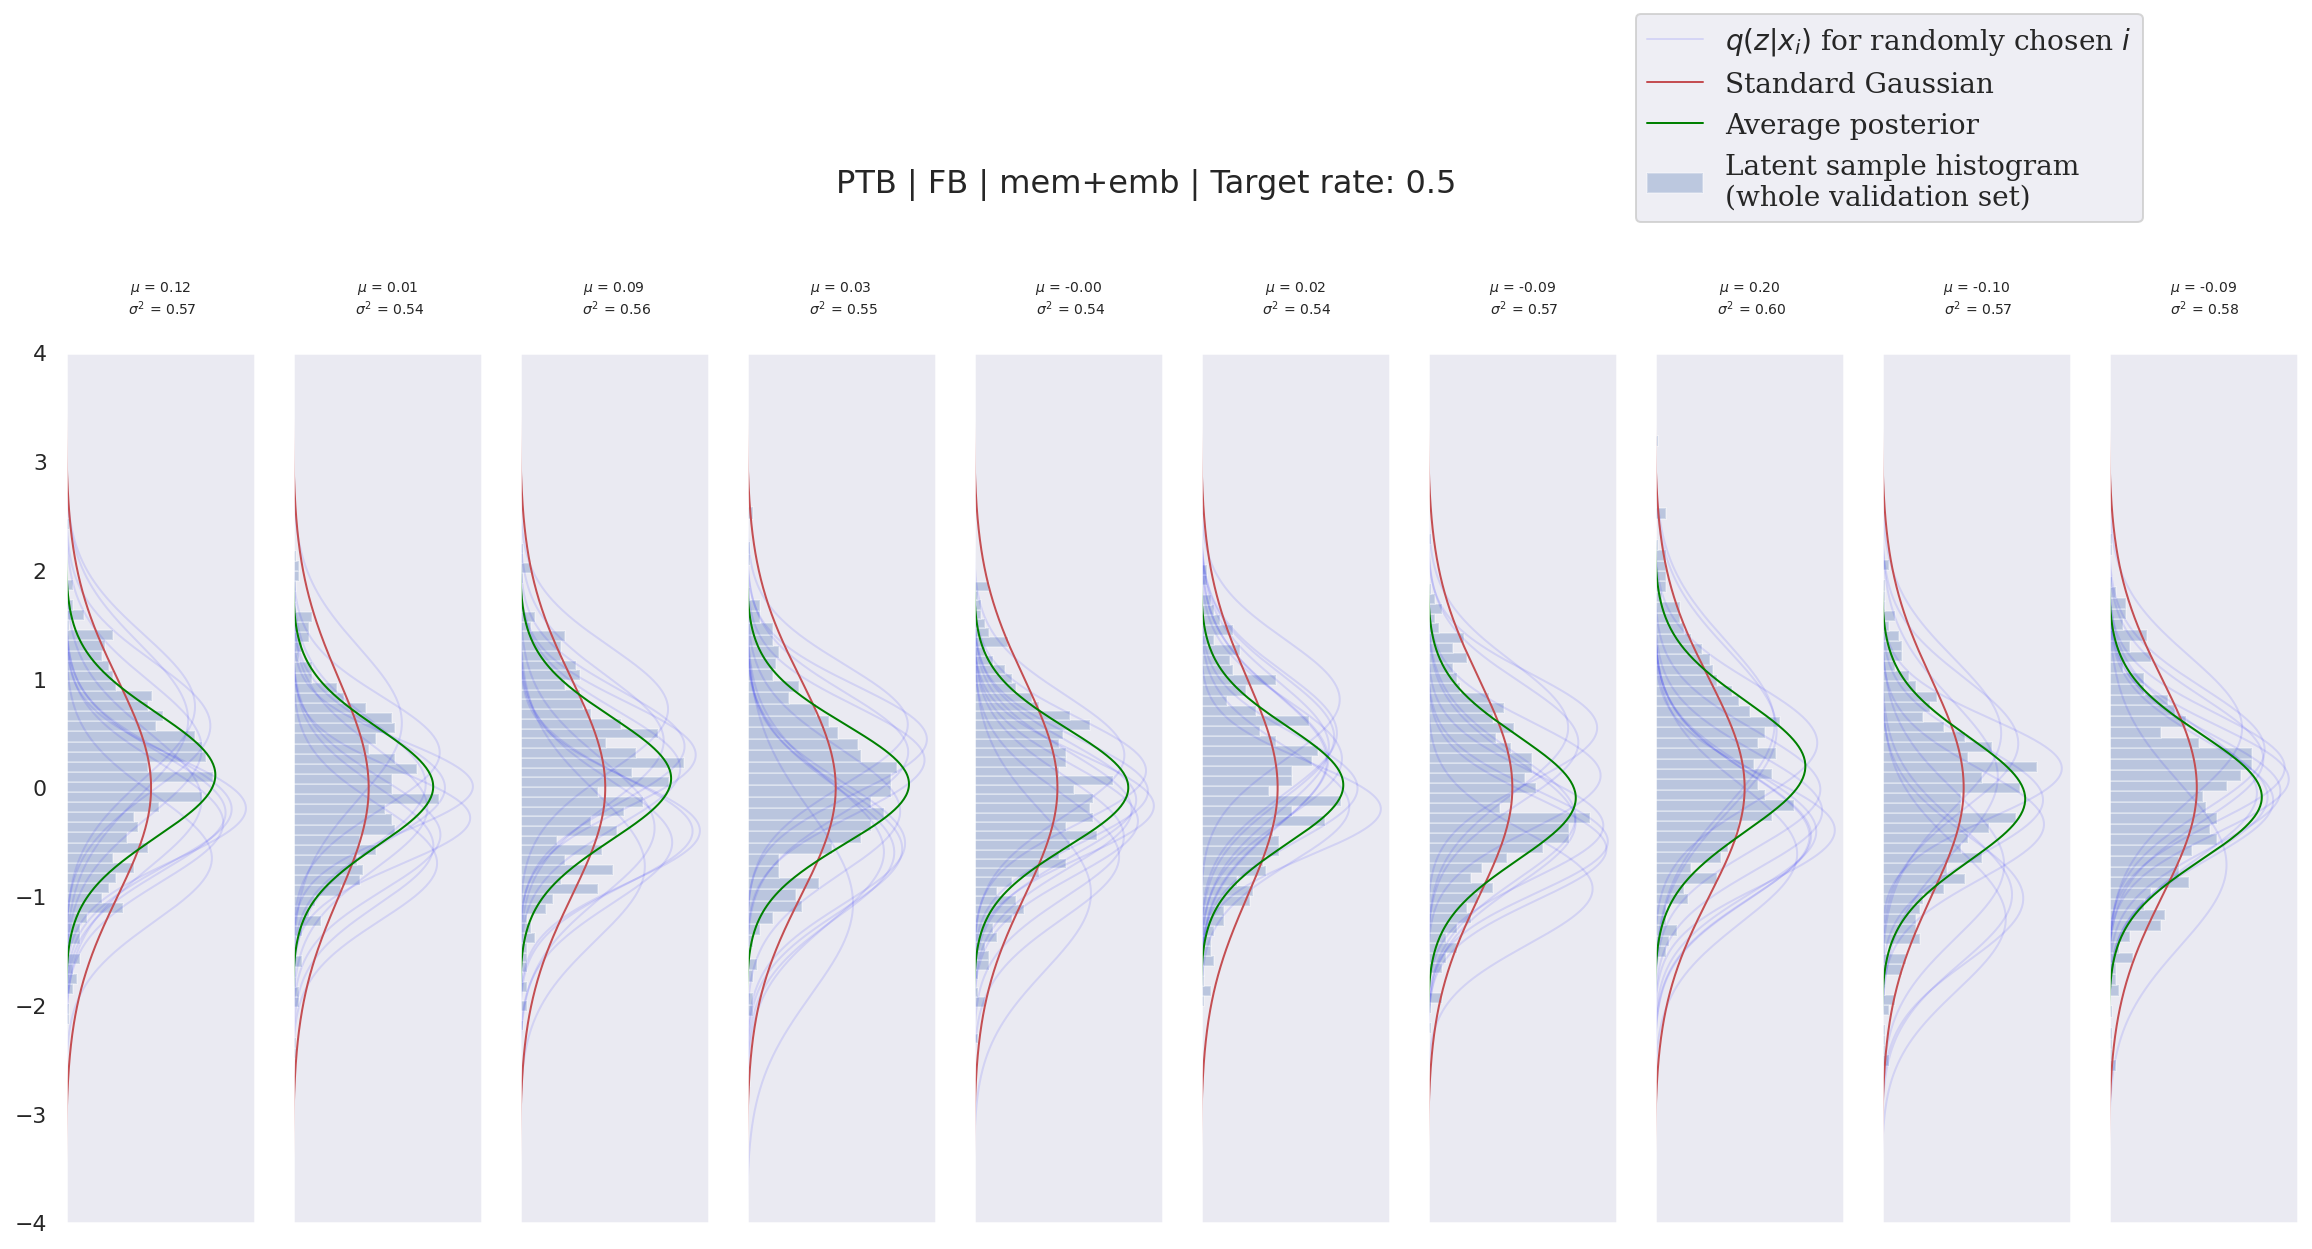

In [8]:
# MMD prior versus approximate posterior

# Get 640 samples of 3 different runs
runs_posts = {
    'PTB | CYC-FB-0.5 | matrix+mem':all_post['Runs']['PTB | CYC-FB-0.5 | matrix+mem'],
    'PTB | VAE | mem+emb':all_post['Runs']['PTB | VAE | mem+emb'],
    'PTB | FB | mem+emb | Target rate: 0.5':all_post["Runs-target-rate"]['PTB | FB | mem+emb | Target rate: 0.5']
}

for name, p in runs_posts.items():
    plot_latents(p, name)

In [9]:
import torch_two_sample

alpha = 0.05

prior_sample = torch.randn((640, 32))

latent_dict = {run_name:v["latents"][:, 0, :] for run_name, v in runs_posts.items()}
latent_dict["prior"] = prior_sample

alphas = [0.1*i for i in range(15)]

"""
torch two samples talks about alpha, while this paper talks about estimating kernel width (is that gamma?)
paper: https://papers.nips.cc/paper/2012/file/dbe272bab69f8e13f14b405e038deb64-Paper.pdf
kernel width might be

from torch_two_sample import util

sample_12 = torch.cat((latents_1, latents_2), 0)
distances = util.pdist(sample_12, sample_12, norm=2)
plt.hist(distances.flatten().numpy(), bins=30)
gamma = median_distance = torch.median(distances).item()
alpha = 1 / (2 * gamma**2)
print(alpha)
"""

for run_name_1 in latent_dict:
    for run_name_2 in latent_dict:
        print("-"*80)
        print(f"Comparing [{run_name_1}] to [{run_name_2}]")
        

        
        latents_1, latents_2 = latent_dict[run_name_1], latent_dict[run_name_2]
        n_1, n_2 = len(latents_1), len(latents_2)
        MMD_stat = torch_two_sample.statistics_diff.MMDStatistic(n_1, n_2)
        mmd, ret_matrix = MMD_stat(latents_1, latents_2, alphas, ret_matrix=True)
        
        pval = MMD_stat.pval(ret_matrix, n_permutations=1000)
        print(f"MMD-statistic: {mmd.item():.4f}, with p-value: {pval}, so we can reject null: {pval < alpha}")

--------------------------------------------------------------------------------
Comparing [PTB | CYC-FB-0.5 | matrix+mem] to [PTB | CYC-FB-0.5 | matrix+mem]
MMD-statistic: -0.0436, with p-value: 1.0, so we can reject null: False
--------------------------------------------------------------------------------
Comparing [PTB | CYC-FB-0.5 | matrix+mem] to [PTB | VAE | mem+emb]
MMD-statistic: 0.0166, with p-value: 0.0, so we can reject null: True
--------------------------------------------------------------------------------
Comparing [PTB | CYC-FB-0.5 | matrix+mem] to [PTB | FB | mem+emb | Target rate: 0.5]
MMD-statistic: 0.0180, with p-value: 0.0, so we can reject null: True
--------------------------------------------------------------------------------
Comparing [PTB | CYC-FB-0.5 | matrix+mem] to [prior]
MMD-statistic: 0.0170, with p-value: 0.0, so we can reject null: True
--------------------------------------------------------------------------------
Comparing [PTB | VAE | mem+emb]

In [10]:
ret_matrix.shape

torch.Size([1280, 1280])

Alpha estimated as the median distance between latents 0.008023908830573927


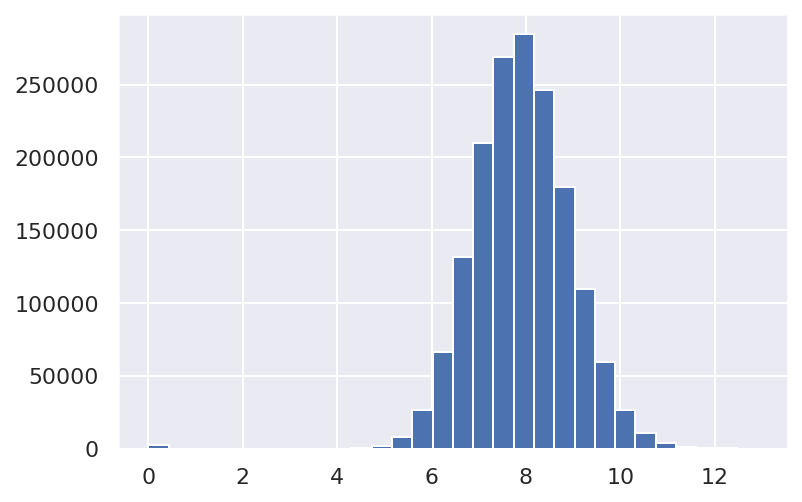

In [11]:
from torch_two_sample import util

sample_12 = torch.cat((latents_1, latents_2), 0)
distances = util.pdist(sample_12, sample_12, norm=2)
plt.hist(distances.flatten().numpy(), bins=30)
gamma = median_distance = torch.median(distances).item()
alpha = 1 / (2 * gamma**2)

print("Alpha estimated as the median distance between latents", alpha)